# Aula Prática: Geração de Imagens com Stable Diffusion

Nesta aula prática, vamos explorar como usar o modelo Stable Diffusion pré-treinado para gerar imagens a partir de descrições textuais. Stable Diffusion é um modelo avançado de geração de imagens desenvolvido pela CompVis, e vamos utilizar uma versão pré-treinada disponível na plataforma Hugging Face. Você pode encontrar o modelo no repositório [Hugging Face](https://huggingface.co/CompVis).

## Introdução à Plataforma Hugging Face
A Hugging Face é uma plataforma de inteligência artificial que se destaca por fornecer acesso a uma ampla variedade de modelos de aprendizado de máquina pré-treinados. Esses modelos abrangem diversas tarefas de processamento de linguagem natural (NLP), visão computacional e muito mais. A Hugging Face oferece uma biblioteca poderosa chamada transformers, que facilita a integração e utilização de modelos pré-treinados em aplicações práticas. Além disso, a Hugging Face também mantém um hub de modelos onde pesquisadores e desenvolvedores podem compartilhar e baixar modelos treinados por outros usuários.

## Tópicos da aula de hoje


* Passo 1: Configuração do Ambiente
* Passo 2: Carregamento do Modelo e Tokenizer
* Passo 3: Geração de Imagens a partir de Prompts Textuais
* Passo 4: Visualização das Imagens Geradas


## Instalando as bibliotecas que serão utilizadas

In [ ]:
# Instalar as bibliotecas necessárias
!pip install diffusers
!pip install transformers
!pip install torch
!pip install matplotlib
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# Importar as bibliotecas necessárias
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# Configurar o dispositivo (GPU ou CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


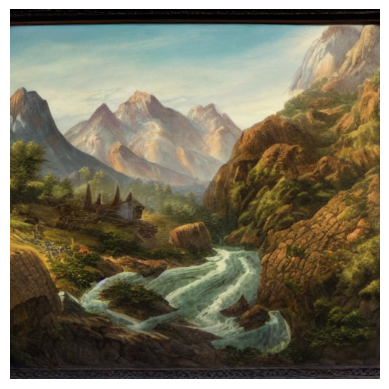

In [ ]:
# Definir um prompt textual para gerar a imagem
prompt = "A fantasy landscape with mountains and a river"

# Gerar a imagem a partir do prompt
with torch.autocast("cuda"):
    image = pipe(prompt).images[0]

# Mostrar a imagem gerada
plt.imshow(image)
plt.axis('off')
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

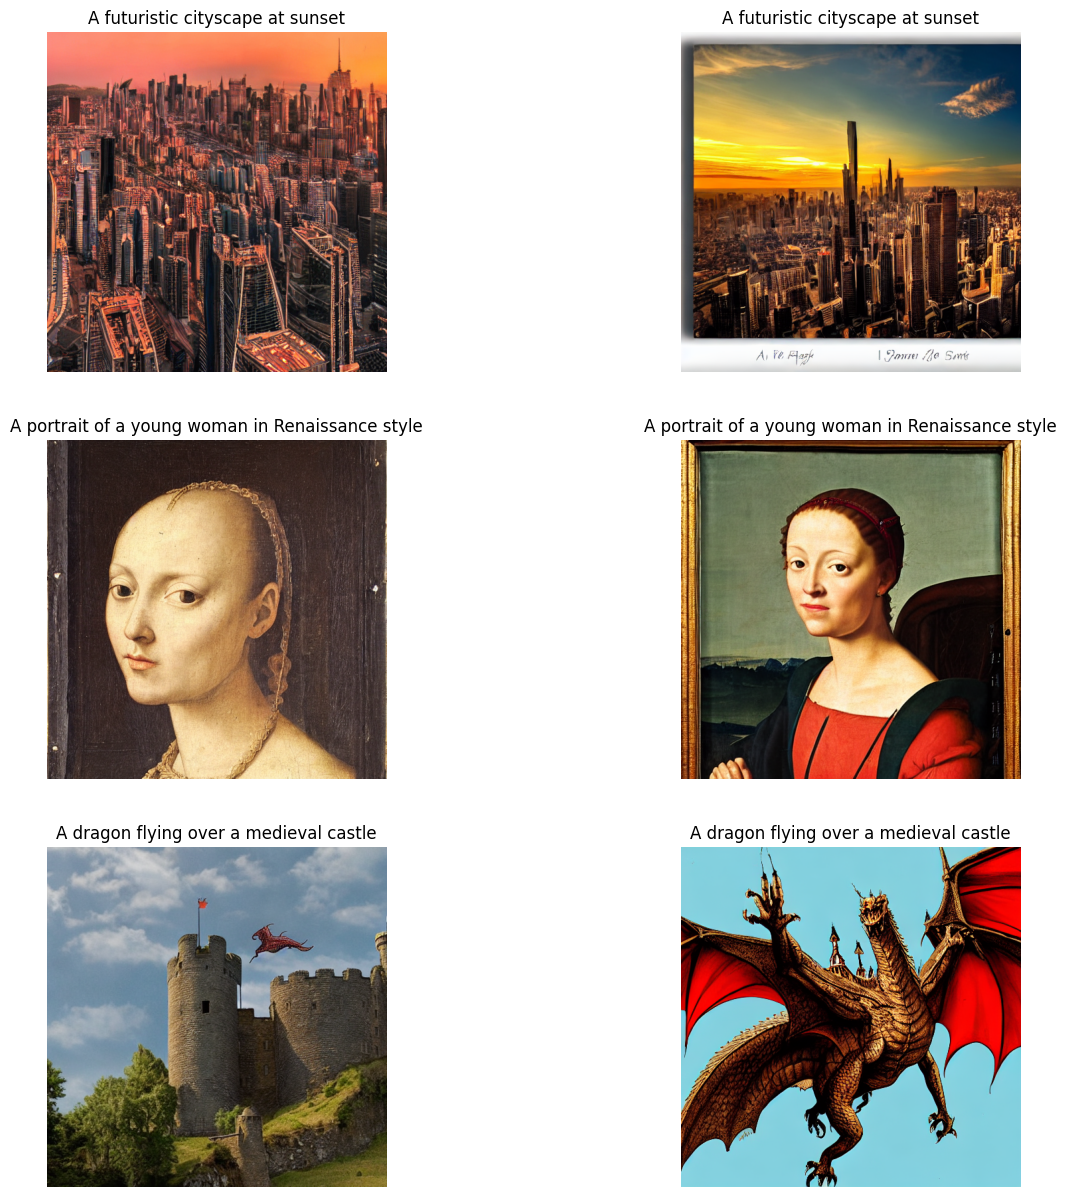

In [ ]:
# Função para gerar e visualizar múltiplas imagens
def generate_images(prompts, num_images=1):
    images = []
    for prompt in prompts:
        for _ in range(num_images):
            with torch.autocast("cuda"):
                image = pipe(prompt).images[0]
            images.append((prompt, image))

    plt.figure(figsize=(15, 5 * len(prompts)))
    for idx, (prompt, image) in enumerate(images):
        plt.subplot(len(prompts), num_images, idx + 1)
        plt.imshow(image)
        plt.title(prompt)
        plt.axis('off')
    plt.show()

# Definir uma lista de prompts
prompts = [
    "A futuristic cityscape at sunset",
    "A portrait of a young woman in Renaissance style",
    "A dragon flying over a medieval castle"
]

# Gerar e visualizar as imagens
generate_images(prompts, num_images=2)